In [1]:
import pandas as pd
import os

In [2]:
test_path = './canonical_test/test_drug_abba_synergy&class_canonical_'
prd_path = './canonical_predict/predict_synergy&class_canonical_'

In [3]:
cell_line_names=os.listdir('./cell_line/')

In [4]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.metrics import cohen_kappa_score
from scipy.stats import pearsonr

In [5]:
def get_reg(cell_line,tst,prd):
    reg = {}
    reg['cell_line'] = cell_line
    reg['mae'] = mean_absolute_error(tst['synergy'],prd['synergy'])
    reg['mse'] = mean_squared_error(tst['synergy'],prd['synergy'])
    reg['r2'] = r2_score(tst['synergy'],prd['synergy'])
    reg['evs'] = explained_variance_score(tst['synergy'],prd['synergy'])
    reg['pearsonr'] = pearsonr(tst['synergy'],prd['synergy'])[0]
    return reg

In [6]:
def get_clf(cell_line,tst,prd):
    clf = {}
    clf['cell_line'] = cell_line
    clf['acc'] = accuracy_score(tst['class'],prd['class'])
    clf['prec'] = precision_score(tst['class'],prd['class'])
    clf['recall'] = recall_score(tst['class'],prd['class'])
    clf['f1'] = f1_score(tst['class'],prd['class'])
    clf['roc_auc'] = roc_auc_score(tst['class'],prd['class'])
    clf['kappa'] = cohen_kappa_score(tst['class'],prd['class'])
    return clf

In [7]:
list_reg = []
list_clf = []
df_reg = pd.DataFrame(columns=['cell_line','mae','mse','r2','evs','pearsonr'])
df_clf = pd.DataFrame(columns=['cell_line','accuracy','precision','recall','f1','roc_auc','kappa'])
for cell_line in cell_line_names:
    prd = pd.read_csv(prd_path+cell_line)
    tst = pd.read_csv(test_path+cell_line)

    list_reg.append(get_reg(cell_line.split('.')[0],tst,prd))
    list_clf.append(get_clf(cell_line.split('.')[0],tst,prd))

reg = df_reg.from_dict(list_reg, orient='columns')
clf = df_clf.from_dict(list_clf, orient='columns')

reg.to_csv('./res_no-enum/regression.csv',index=False)
clf.to_csv('./res_no-enum/classification.csv',index=False)
    

## 纯canonical 未数据增强的测试结果

In [8]:
reg.describe()

,mae,mse,r2,evs,pearsonr
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,10.407404,244.583765,0.526828,0.535619,0.737301
std,3.164818,196.376369,0.105897,0.103959,0.065521
min,5.621530,59.052252,0.294015,0.312816,0.594042
25%,8.851475,145.008075,0.447417,0.460935,0.679436
50%,9.248575,178.858903,0.540140,0.546735,0.746702
75%,11.418536,233.998281,0.611303,0.617486,0.788188
max,21.773913,894.148554,0.704110,0.705936,0.842462


In [9]:
clf.describe()

,acc,prec,recall,f1,roc_auc,kappa
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.926000,0.629125,0.447151,0.511676,0.709496,0.473200
std,0.027738,0.205582,0.178379,0.176003,0.084826,0.171364
min,0.855372,0.000000,0.000000,0.000000,0.493213,-0.021034
25%,0.905579,0.554945,0.345238,0.443198,0.667335,0.403667
50%,0.931330,0.666667,0.470588,0.555556,0.721963,0.527235
75%,0.945244,0.768889,0.565714,0.633929,0.767906,0.586697
max,0.969957,0.888889,0.826087,0.808511,0.901139,0.787042


In [11]:
clf

,cell_line,acc,prec,recall,f1,roc_auc,kappa
0,A2058,0.900826,0.687500,0.611111,0.647059,0.781284,0.589599
1,A2780,0.922747,0.760000,0.612903,0.678571,0.791600,0.635241
2,A375,0.855372,0.666667,0.478261,0.556962,0.711069,0.473324
3,A427,0.925620,0.652174,0.600000,0.625000,0.781567,0.583795
4,CAOV3,0.900826,0.735294,0.625000,0.675676,0.790223,0.617593
5,COLO320DM,0.950413,0.571429,0.307692,0.400000,0.647296,0.376556
6,DLD1,0.965665,0.714286,0.454545,0.555556,0.722768,0.538614
7,EFM192B,0.933884,0.571429,0.444444,0.500000,0.708829,0.465193
8,ES2,0.933884,0.454545,0.333333,0.384615,0.653451,0.350554
9,HCT116,0.933884,0.777778,0.333333,0.466667,0.662142,0.437373


## data-mixed中的测试结果

In [65]:
## data-mixed中的测试结果
reg.describe()

,mae,mse,r2,evs,pearsonr
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,4.392709,51.342352,0.897176,0.899475,0.948399
std,1.552530,44.234418,0.036430,0.035234,0.018784
min,2.712584,16.324802,0.801153,0.801879,0.895520
25%,3.458584,27.767639,0.883335,0.884264,0.940462
50%,3.812632,33.399759,0.906338,0.906533,0.952221
75%,4.640412,51.077716,0.921978,0.925158,0.962455
max,9.013951,199.599326,0.960917,0.961959,0.980828


In [59]:
clf.describe()

,acc,prec,recall,f1,roc_auc
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.969021,0.811360,0.762242,0.782484,0.873592
std,0.013979,0.070566,0.104213,0.077094,0.050873
min,0.920421,0.649635,0.466667,0.551181,0.728131
25%,0.963136,0.757979,0.713172,0.735448,0.851416
50%,0.968988,0.827957,0.782609,0.785714,0.884991
75%,0.979518,0.858259,0.845757,0.828525,0.916021
max,0.987349,0.929825,0.929515,0.902128,0.948707


In [45]:
prd_sig = pd.read_csv('../experiments/res/synergy&class/test_data_predict_A375.csv')
tst_sig = pd.read_csv('../experiments/res/test_data/test_data_A375.csv')

In [47]:
df_test = get_reg(tst_sig,prd_sig)

In [36]:
import pandas as pd

In [50]:
print(get_reg(tst_sig,prd_sig))

{'mae': 5.520733008057668, 'mse': 66.83431003030653, 'r2': 0.8886087281413977, 'evs': 0.8893441632998154}


In [25]:
mae = mean_absolute_error(tst_sig['synergy'],prd_sig['synergy'])
mse = mean_squared_error(tst_sig['synergy'],prd_sig['synergy'])
r2 = r2_score(tst_sig['synergy'],prd_sig['synergy'])
evs = explained_variance_score(tst_sig['synergy'],prd_sig['synergy'])

In [27]:
print('regression | mae {:.3f} | mse {:.3f} | r2 {:.3f} | evs {:.3f}'.format(mae,mse,r2,evs))

regression | mae 5.521 | mse 66.834 | r2 0.889 | evs 0.889


In [29]:
acc = accuracy_score(tst_sig['class'],prd_sig['class'])
prec = precision_score(tst_sig['class'],prd_sig['class'])
recall = recall_score(tst_sig['class'],prd_sig['class'])
f1 = f1_score(tst_sig['class'],prd_sig['class'])
roc_auc = roc_auc_score(tst_sig['class'],prd_sig['class'])

In [30]:
print('classification | acc {:.3f} | prec {:.3f} | recall {:.3f} | f1 {:.3f} | roc_auc {:.3f}'.format(acc,prec,recall,f1,roc_auc))

classification | acc 0.943 | prec 0.766 | recall 0.757 | f1 0.761 | roc_auc 0.863


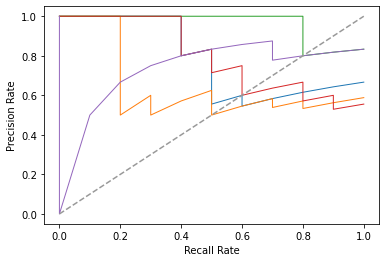

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,datasets,linear_model
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,precision_recall_curve
from sklearn.model_selection import KFold,StratifiedKFold
 
iris = datasets.load_iris()
X = iris.data
y = iris.target
X,y = X[y!=2],y[y!=2]													 # 去掉了label为2，label只能二分才可以
n_samples,n_features = X.shape
random_state = np.random.RandomState(0)
X = np.c_[X,random_state.randn(n_samples,200*n_features)]
kfold = StratifiedKFold(n_splits=5)										 # 使用5折交叉验证，并且画ROC曲线
cv = kfold.split(X,y)
classifier = svm.SVC(kernel="linear",probability=True,random_state=random_state) 
for i,(train,test) in enumerate(cv):									 # 通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分
	probas_ = classifier.fit(X[train],y[train]).predict_proba(X[test])
	precision,recall,thresholds = precision_recall_curve(y[test],probas_[:,1])# 最重要的函数：通过precision_recall_curve()函数，求出recall，precision，以及阈值
	plt.plot(recall,precision,lw=1)
plt.plot([0,1],[0,1],'--',color=(0.6,0.6,0.6),label="Luck")				 # 画对角线		 
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel("Recall Rate")
plt.ylabel("Precision Rate")
plt.show()